## K means

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from PIL import Image

In [16]:
img_path = "rotated-spiderman.jpg" #load the Scoob poster

# Перетворюємо масив (можна скзати зкомпресований) заново у картинку із codebook та labels
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

### Colors = 64

In [17]:
colors_num = 64
# Вичитуємо картинку у ndarray для подальшої обробки
main_image = plt.imread(img_path)

# Перетворюємо 8 бітні числа у числа із проміжку [0-1] для обробки
main_image = np.array(main_image, dtype=np.float64) / 255

# Завантажуємо картинку і перертворюємо у 2d numpy масив
w, h, d = original_shape = tuple(main_image.shape)
assert d == 3
image_array = np.reshape(main_image, (w * h, d))


# === K means ===
# Випадково розпорошуємо змінні у масиві та вибираємо семпли для тренування
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
# тренуємо k means на наших даних
kmeans = KMeans(n_clusters=colors_num, n_init="auto", random_state=0).fit(
    image_array_sample
)
# Застосовуємо натренований k_means на нашій картинці
labels = kmeans.predict(image_array)

In [18]:
# === Random ===
# Випадково розпорошуємо змінні у масиві та вибираємо лише кольори штуки -- colors_num
codebook_random = shuffle(image_array, random_state=0, n_samples=colors_num)
# Обчислюємо мінімальні відстані між однією точкою та набором точок
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

### Кількість кольорів на картинці

In [19]:
img = Image.open(img_path)

unique_colors = set(img.getdata())
length = len(unique_colors)
print("colors amount: ", length)

colors amount:  306607


### Результат для Оригінальної картинки / 64 кольори k means / 64 кольори random

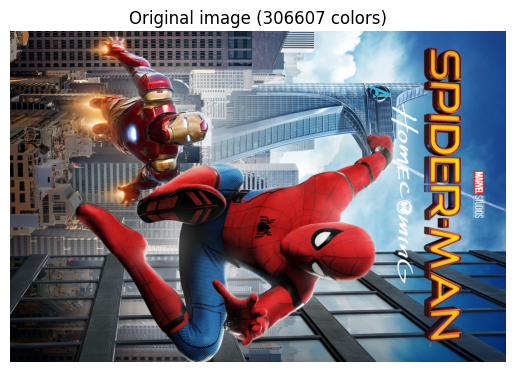

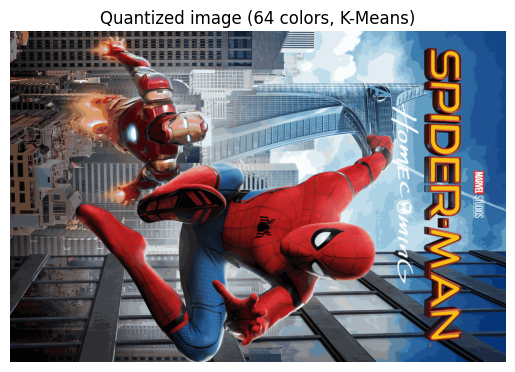

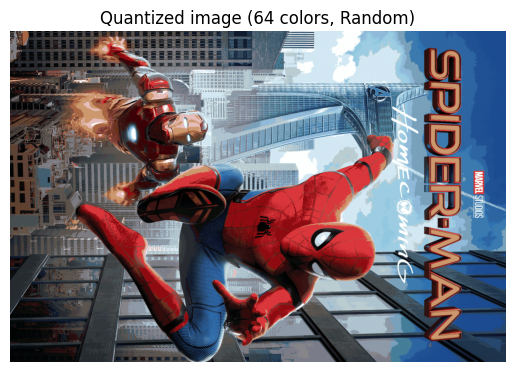

In [20]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image ({length} colors)")
plt.imshow(main_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

### Colors = 32

In [21]:
colors_num = 32
# Вичитуємо картинку у ndarray для подальшої обробки
main_image = plt.imread(img_path)

# Перетворюємо 8 бітні числа у числа із проміжку [0-1] для обробки
main_image = np.array(main_image, dtype=np.float64) / 255

# Завантажуємо картинку і перертворюємо у 2d numpy масив
w, h, d = original_shape = tuple(main_image.shape)
assert d == 3
image_array = np.reshape(main_image, (w * h, d))


# === K means ===
# Вибираємо кольори за допомогою k means
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
# тренуємо k means на наших даних
kmeans = KMeans(n_clusters=colors_num, n_init="auto", random_state=0).fit(
    image_array_sample
)
# Застосовуємо натренований k_means на нашій картинці
labels = kmeans.predict(image_array)

In [22]:
# === Random ===
codebook_random = shuffle(image_array, random_state=0, n_samples=colors_num)
# Обчислюємо мінімальні відстані між однією точкою та набором точок
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

### Результат для Оригінальної картинки / 32 кольори k means / 32 кольори random

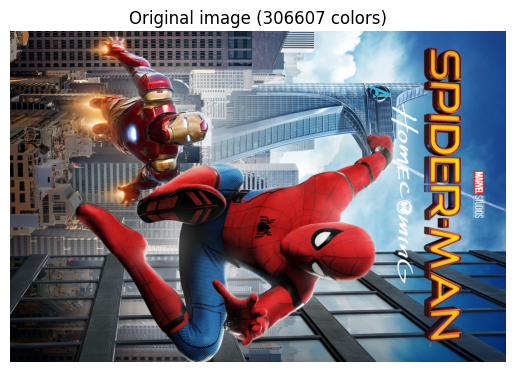

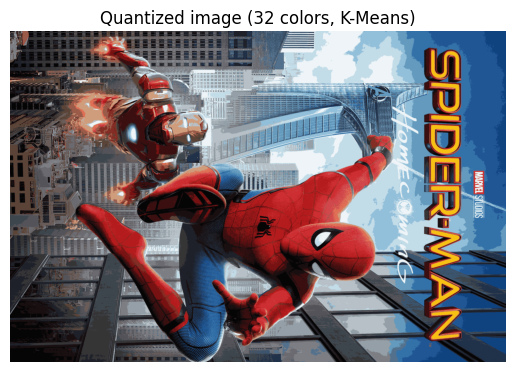

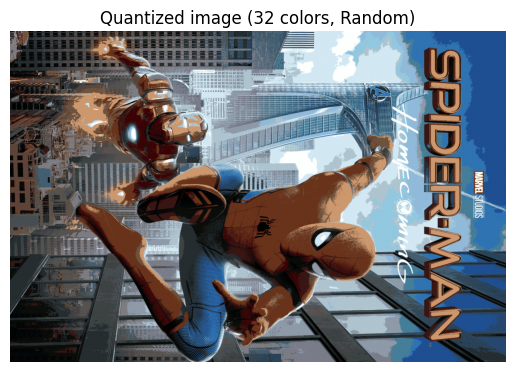

In [23]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image ({length} colors)")
plt.imshow(main_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

### Colors = 16

In [24]:
colors_num = 16
# Вичитуємо картинку у ndarray для подальшої обробки
main_image = plt.imread(img_path)

# Перетворюємо 8 бітні числа у числа із проміжку [0-1] для обробки
main_image = np.array(main_image, dtype=np.float64) / 255

# Завантажуємо картинку і перертворюємо у 2d numpy масив
w, h, d = original_shape = tuple(main_image.shape)
assert d == 3
image_array = np.reshape(main_image, (w * h, d))


# === K means ===
# Вибираємо кольори за допомогою k means
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
# тренуємо k means на наших даних
kmeans = KMeans(n_clusters=colors_num, n_init="auto", random_state=0).fit(
    image_array_sample
)
# Застосовуємо натренований k_means на нашій картинці
labels = kmeans.predict(image_array)

In [25]:
# === Random ===
codebook_random = shuffle(image_array, random_state=0, n_samples=colors_num)
# Обчислюємо мінімальні відстані між однією точкою та набором точок
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

### Результат для Оригінальної картинки / 16 кольорів k means / 16 кольорів random

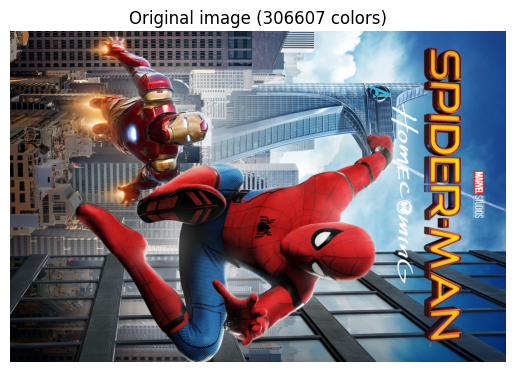

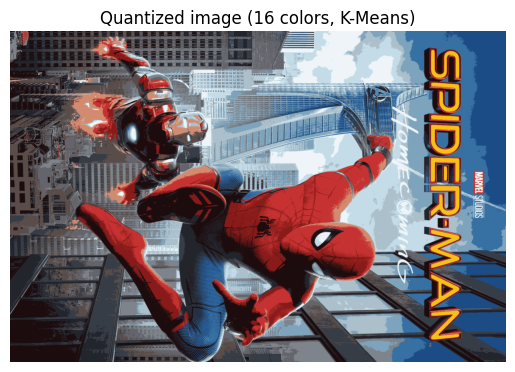

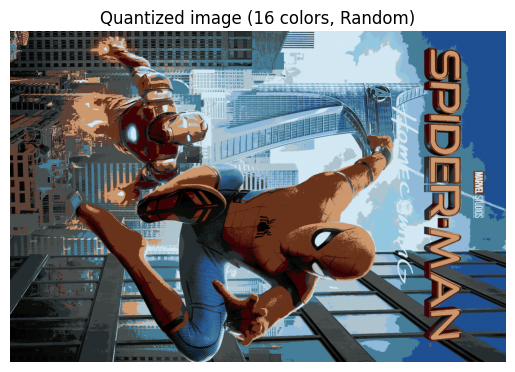

In [26]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image ({length} colors)")
plt.imshow(main_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Colors = 8

In [27]:
colors_num = 8
# Вичитуємо картинку у ndarray для подальшої обробки
main_image = plt.imread(img_path)

# Перетворюємо 8 бітні числа у числа із проміжку [0-1] для обробки
main_image = np.array(main_image, dtype=np.float64) / 255

# Завантажуємо картинку і перертворюємо у 2d numpy масив
w, h, d = original_shape = tuple(main_image.shape)
assert d == 3
image_array = np.reshape(main_image, (w * h, d))


# === K means ===
# Вибираємо кольори за допомогою k means
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
# тренуємо k means на наших даних
kmeans = KMeans(n_clusters=colors_num, n_init="auto", random_state=0).fit(
    image_array_sample
)
# Застосовуємо натренований k_means на нашій картинці
labels = kmeans.predict(image_array)

### Результат для Оригінальної картинки / 16 кольорів k means / 16 кольорів random

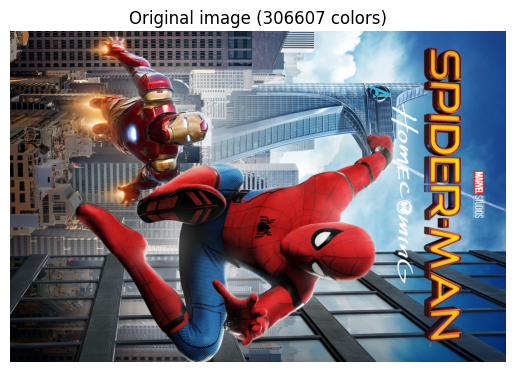

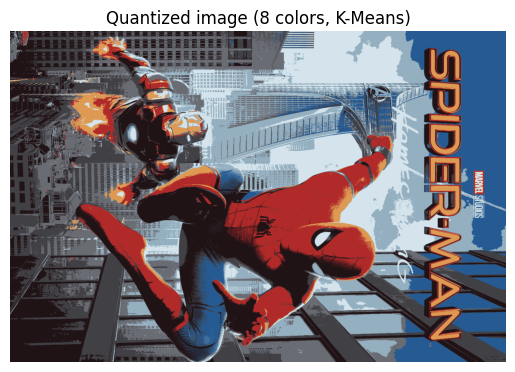

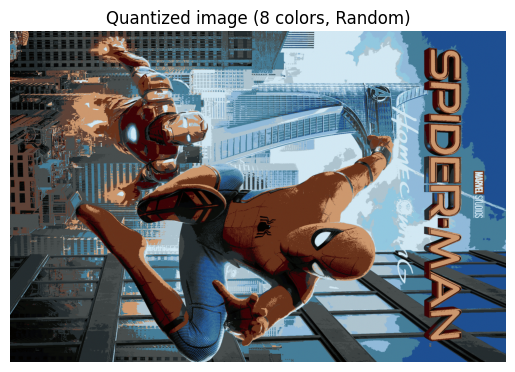

In [28]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image ({length} colors)")
plt.imshow(main_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({colors_num} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()